<a href="https://colab.research.google.com/github/niteshctrl/transfer_learning_vgg16/blob/main/52_CIFAR10_with_Trasfer_Learning(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


In [ ]:
# Import Required Libraries

from keras.datasets import cifar10

from keras import Sequential
from keras.models import Model
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.utils import to_categorical
from keras.layers import Flatten, Dense, Input
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Download the CIFAR-10 dataset

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
input_shape = (32, 32, 3)

In [ ]:
# Shapes of training and test data

print("Shape of Train data(X_train) = {} and labels(y_train) = {}".format(X_train.shape, y_train.shape))
print("Shape of Test data(X_test) = {} and test labels(y_test) = {}".format(X_test.shape, y_test.shape))

Shape of Train data(X_train) = (50000, 32, 32, 3) and labels(y_train) = (50000, 1)
Shape of Test data(X_test) = (10000, 32, 32, 3) and test labels(y_test) = (10000, 1)


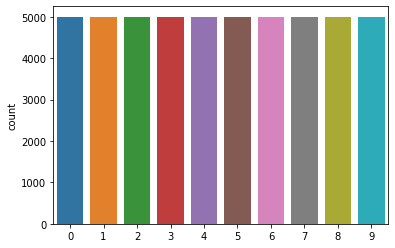

In [ ]:
# Distribution of Train data

sns.countplot(x=y_train.flatten())
plt.show()

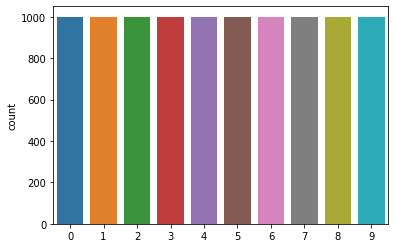

In [ ]:
# Distribution of Test data

sns.countplot(x=y_test.flatten())
plt.show()

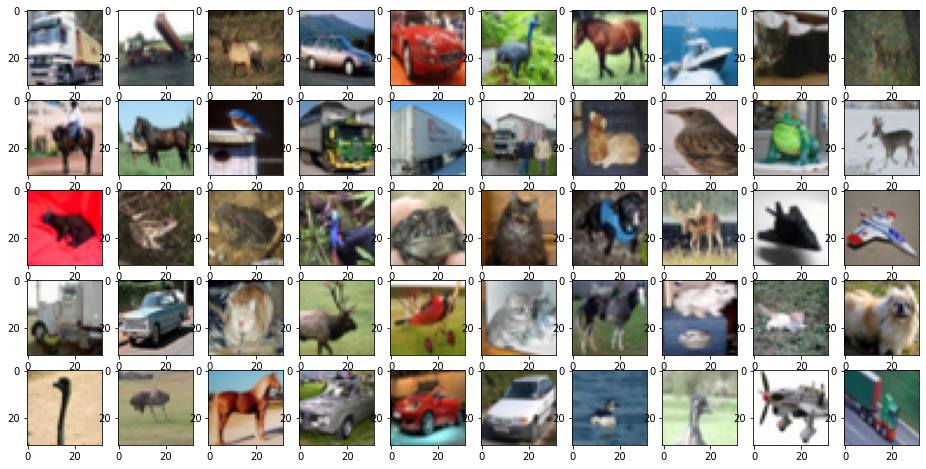

In [ ]:
# Visualising a few input data

fig=plt.figure(figsize=(16, 8))
columns = 10
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [ ]:
# One-Hot Encoding the Output labels

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Image Augmentation

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,
        preprocessing_function=preprocess_input)  # Change RGB to BGR channels

datagen.fit(X_train)

# Modelling

In [ ]:
# load model with pretrained weights from IMAGENET and modified output layer

model = VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor = Input(shape=input_shape),
    classes=10
    )

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
# Freeze the initial layers

c = 0
for layer in model.layers:
    if c < 14:
        layer.trainable = False
    c = c + 1

In [ ]:
# Append the FC layers

flatten_layer = Flatten()(model.output)
dense1 = Dense(128, activation='relu')(flatten_layer)
dense2 = Dense(128, activation='relu')(dense1)
prediction = Dense(10, activation='softmax')(dense1)

In [ ]:
# Create a model object

my_model = Model(inputs=model.input, outputs=prediction)

In [ ]:
my_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
# Compile the model

my_model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:

X_train = preprocess_input(X_train)

In [ ]:
my_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# Fit the model with the data generated

my_model.fit(datagen.flow(X_train, y_train), epochs=10, validation_data=(X_test, y_test))

In [ ]:
'''Images can be prepared for a given model using the preprocess_input() 
function; e.g., pixel scaling is performed in a way that was performed to images
in the training dataset when the model was developed'''

x_tr = preprocess_input(x_tr)
y_tr = to_categorical(y_tr, num_classes=10)

In [ ]:
x_test = preprocess_input(x_test)
y_test = to_categorical(y_test, num_classes=10)